In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DF = pd.read_excel(r'C:\Users\geosh\Documents\DATASETS AND PROJECTS\kdramadata.xlsx')

In [3]:
DF

,TITLE,YEAR,NETWORK,AIRED ON,EPISODES,DURATION,CONTENT RATING,RATING,GENRES,DIRECTOR,PRODUCTION COMPANY,POSITION,ENDINGDATE,AIREDDATE
0,Move to Heaven,2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,"Life, Drama, Family",Kim Sung Ho,"Page One Film, Number Three Pictures",#1,"May 14, 2021","May 14, 2022"
1,Flower of Evil,2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,"Thriller, Romance, Crime, Melodrama","Kim Chul Gyu, Yoon Jong Ho",Monster Union,#2,"Sep 23, 2020","Jul 29, 2020"
2,Hospital Playlist,2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,"Friendship, Romance, Life, Medical",Shin Won Ho,"Egg Is Coming, CJ ENM",#3,"May 28, 2020","Mar 12, 2020"
3,Hospital Playlist 2,2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,"Friendship, Romance, Life, Medical",Shin Won Ho,"Egg Is Coming, CJ ENM",#4,"Sep 16, 2021","Jun 17, 2021"
4,My Mister,2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,"Psychological, Life, Drama, Family","Kim Won Suk, Kim Sang Woo",Chorokbaem Media,#5,"May 17, 2018","Mar 21, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Live Up to Your Name,2017,tvN,"Saturday, Sunday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"Historical, Romance, Medical, Fantasy",Hong Jong Chan,Bon Factory Worldwide,#246,"Oct 1, 2017","Aug 12, 2017"
244,Queen for Seven Days,2017,KBS2,"Wednesday, Thursday",20,60 min.,15+ - Teens 15 or older,8.3,"Historical, Romance, Melodrama, Political",Lee Jung Sub,"Monster Union, OH!BROTHERS Production",#247,"Aug 3, 2017","May 31, 2017"
245,Memory,2016,tvN,"Friday, Saturday",16,1 hr. 5 min.,15+ - Teens 15 or older,8.3,"Law, Romance, Life, Drama",Park Chan Hong,MI Inc.,#248,"May 7, 2016","Mar 18, 2016"
246,A Korean Odyssey,2017,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,8.3,"Horror, Comedy, Romance, Fantasy","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo",JS Pictures,#249,"Mar 4, 2018","Dec 23, 2017"


# EXPLORATORY ANALYSIS OF DATAFRAME

In [4]:
DF.keys()

Index(['TITLE ', 'YEAR', 'NETWORK', 'AIRED ON', 'EPISODES', 'DURATION',
       'CONTENT RATING', 'RATING', 'GENRES', 'DIRECTOR', 'PRODUCTION COMPANY',
       'POSITION', 'ENDINGDATE', 'AIREDDATE'],
      dtype='object')

In [5]:
DF.count()

TITLE                 248
YEAR                  248
NETWORK               248
AIRED ON              248
EPISODES              248
DURATION              248
CONTENT RATING        243
RATING                248
GENRES                248
DIRECTOR              247
PRODUCTION COMPANY    246
POSITION              248
ENDINGDATE            248
AIREDDATE             244
dtype: int64

In [6]:
DF['EPISODES'].mean()

19.096774193548388

# VISUALIZACIONES

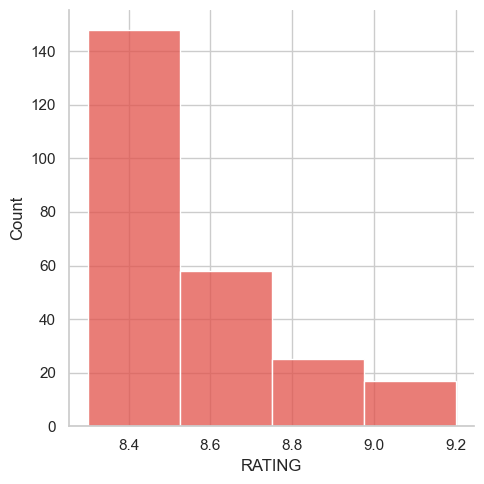

In [7]:
## /// RATINGS /// **

import seaborn as sns
RATING = DF['RATING']
sns.set_theme(style="whitegrid", palette="Spectral")
sns.displot(RATING, bins=4)

In [8]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)

# So that warning doesn't pop up
import warnings
warnings.filterwarnings("ignore")

In [9]:
#IN THIS LINE WE GET THE COUNT OF KDRAMAS PER YEAR THAT APPEARED IN RATINGS
KDRAMAS_PER_YEAR = DF.groupby('YEAR').size().reset_index().rename(columns = {0:'Count'})


In [10]:
fig = px.bar(KDRAMAS_PER_YEAR,
              x = 'YEAR',
              y = 'Count', color='Count',  color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [11]:
##VISUALIZATION OF KDRAMA AIRED ON AND BY YEAR 
KDRAMASBYAIREDDAYS = DF.groupby(['YEAR','AIRED ON']).size().reset_index().rename(columns = {0:'Count'})
KDRAMASBYAIREDDAYS


,YEAR,AIRED ON,Count
0,2003,"Monday, Tuesday",1
1,2006,"Monday, Tuesday",1
2,2007,"Monday, Tuesday",1
3,2009,"Monday, Tuesday",1
4,2010,"Monday, Tuesday",1
...,...,...,...
89,2022,"Friday, Saturday",8
90,2022,"Monday, Tuesday",4
91,2022,"Saturday, Sunday",6
92,2022,Wednesday,3


In [12]:
fig = px.bar(KDRAMASBYAIREDDAYS
,
             x = 'YEAR',
             y = 'Count',
             color = 'AIRED ON',
             barmode = 'stack',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [13]:
num_episode = DF['EPISODES'].value_counts().reset_index().rename(columns={'Number of Episode':'Count','index':'Num Ep'})


In [14]:
num_episode 

,Num Ep,EPISODES
0,16,114
1,20,29
2,12,26
3,32,16
4,6,9
5,10,7
6,8,6
7,24,5
8,14,4
9,40,4


In [15]:

fig = px.pie(data_frame = num_episode,
             values = 'EPISODES', names = 'Num Ep',
             color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_traces(textposition = 'inside',
                  textinfo = 'label+percent',
                  pull = [0.05] * num_episode['Num Ep'].nunique(),
                  insidetextorientation='horizontal')

fig.update_layout(title = 'Distribution of Number of Episodes among Top 100',
                  legend_title = 'Number of Episode',
                  uniformtext_minsize = 13,
                  uniformtext_mode = 'hide',
                  font = dict(family = 'Courier New, monospace',
                              size = 15,
                              color = 'black'))


fig.show()

In [16]:
DF['NETWORK'].value_counts()

tvN                       48
SBS                       30
MBC                       26
KBS2                      25
OCN                       19
Netflix,  tvN             16
jTBC                      15
Netflix                   12
Netflix, tvN               8
jTBC, Netflix              4
Netflix, SBS               4
MBC, Netflix               3
Netflix,  SBS              2
jTBC,  Netflix             2
YouTube                    2
iQiyi, tvN                 2
jTBC, Viki                 2
Wavve                      2
Viki                       1
Naver TV Cast              1
iQiyi, KBS2, Viki          1
Channel A                  1
Hulu                       1
SBS, ViuTV                 1
MBN                        1
TV Chosun                  1
Daum Kakao TV              1
KBS2, Netflix              1
Apple TV+                  1
Disney+                    1
Daum Kakao TV, Netflix     1
MBC, ViuTV                 1
tvN, ViuTV                 1
KBS2, ViuTV                1
ENA, Olleh TV 

In [17]:
# Counting individual network
from collections import Counter

network_list = []
for NETWORK in DF['NETWORK'].to_list():
    NETWORK = NETWORK.strip().split(", ")
    for NETWORK in NETWORK:
        network_list.append(NETWORK)
        

In [41]:
network_df = pd.DataFrame.from_dict(Counter(network_list),orient='index').rename(columns={0:'Count'})
network_df.sort_values(by='Count',ascending = False,inplace = True)
network_df.reset_index(inplace=True)
network_df.rename(columns={'index':'Network'},inplace=True)

network_df


,Network,Count
0,tvN,60
1,Netflix,53
2,SBS,35
3,MBC,32
4,KBS2,29
5,jTBC,24
6,OCN,20
7,tvN,16
8,Viki,5
9,ViuTV,5


In [43]:

fig = px.bar(network_df
,
             x = 'Network',
             y = 'Count',
             color = 'Network',
             barmode = 'stack',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title = 'KDRAMAS PER NETWORK',
                  legend_title = 'Network',
                  uniformtext_minsize = 13,
                  uniformtext_mode = 'hide',
                  font = dict(family = 'Courier New, monospace',
                              size = 15,
                              color = 'RED'))
fig.show()

In [20]:
#VISUAZATION OF DURATION

In [22]:
DF['DURATION'].value_counts()

1 hr. 10 min.    54
60 min.          40
1 hr. 5 min.     36
35 min.          23
1 hr. 20 min.    15
1 hr. 15 min.    14
1 hr. 2 min.      7
1 hr. 3 min.      5
52 min.           3
1 hr. 7 min.      3
20 min.           3
1 hr. 9 min.      3
50 min.           3
30 min.           3
1 hr. 25 min.     3
58 min.           2
15 min.           2
1 hr. 30 min.     2
1 hr. 4 min.      2
1 hr. 17 min.     2
55 min.           2
1 hr. 6 min.      2
45 min.           2
1 hr. 8 min.      2
1 hr. 13 min.     2
1 hr. 40 min.     2
25 min.           1
44 min.           1
33 min.           1
1 hr. 22 min.     1
54 min.           1
1 hr. 11 min.     1
40 min.           1
1 hr. 21 min.     1
1 hr. 32 min.     1
51 min.           1
24 min.           1
Name: DURATION, dtype: int64

In [23]:
##DEFINIENDO FUNCION PARA CONVERTIR DURACION A MINUTOS QUE 
#SE PUEDAN UTILIZAR EN GRÁFICA POSTERIOR

def duration_converter(title):
    minute = title.split('.')
    if len(minute) == 3:
        hour = 60*int(minute[0].split()[0])
        adj_minute = int(minute[1].split()[0])
        return hour+adj_minute
    if len(minute)==2:
        adj_minute = int(minute[0].split()[0])
        return adj_minute


In [47]:
DF['Duration(min)'] = DF['DURATION'].apply(lambda x : duration_converter(x))
DF.drop("DURATION",axis=1,inplace=True)

,TITLE,YEAR,NETWORK,AIRED ON,EPISODES,CONTENT RATING,RATING,GENRES,DIRECTOR,PRODUCTION COMPANY,POSITION,ENDINGDATE,AIREDDATE,Duration(min)
0,Move to Heaven,2021,Netflix,Friday,10,18+ Restricted (violence & profanity),9.2,"Life, Drama, Family",Kim Sung Ho,"Page One Film, Number Three Pictures",#1,"May 14, 2021","May 14, 2022",52
1,Flower of Evil,2020,tvN,"Wednesday, Thursday",16,15+ - Teens 15 or older,9.1,"Thriller, Romance, Crime, Melodrama","Kim Chul Gyu, Yoon Jong Ho",Monster Union,#2,"Sep 23, 2020","Jul 29, 2020",70
2,Hospital Playlist,2020,"Netflix, tvN",Thursday,12,15+ - Teens 15 or older,9.1,"Friendship, Romance, Life, Medical",Shin Won Ho,"Egg Is Coming, CJ ENM",#3,"May 28, 2020","Mar 12, 2020",90
3,Hospital Playlist 2,2021,"Netflix, tvN",Thursday,12,15+ - Teens 15 or older,9.1,"Friendship, Romance, Life, Medical",Shin Won Ho,"Egg Is Coming, CJ ENM",#4,"Sep 16, 2021","Jun 17, 2021",100
4,My Mister,2018,tvN,"Wednesday, Thursday",16,15+ - Teens 15 or older,9.1,"Psychological, Life, Drama, Family","Kim Won Suk, Kim Sang Woo",Chorokbaem Media,#5,"May 17, 2018","Mar 21, 2018",77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Live Up to Your Name,2017,tvN,"Saturday, Sunday",16,15+ - Teens 15 or older,8.3,"Historical, Romance, Medical, Fantasy",Hong Jong Chan,Bon Factory Worldwide,#246,"Oct 1, 2017","Aug 12, 2017",70
244,Queen for Seven Days,2017,KBS2,"Wednesday, Thursday",20,15+ - Teens 15 or older,8.3,"Historical, Romance, Melodrama, Political",Lee Jung Sub,"Monster Union, OH!BROTHERS Production",#247,"Aug 3, 2017","May 31, 2017",60
245,Memory,2016,tvN,"Friday, Saturday",16,15+ - Teens 15 or older,8.3,"Law, Romance, Life, Drama",Park Chan Hong,MI Inc.,#248,"May 7, 2016","Mar 18, 2016",65
246,A Korean Odyssey,2017,"Netflix, tvN","Saturday, Sunday",20,15+ - Teens 15 or older,8.3,"Horror, Comedy, Romance, Fantasy","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo",JS Pictures,#249,"Mar 4, 2018","Dec 23, 2017",80


In [57]:
DURATION_DF = DF['Duration(min)'].value_counts().reset_index()
DURATION_DF.rename(columns={'Duration(min)':'COUNT'},inplace=True)
DURATION_DF.rename(columns={'index':'DurationInMinutes'},inplace=True)
DURATION_DF

,DurationInMinutes,COUNT
0,70,54
1,60,40
2,65,36
3,35,23
4,80,15
5,75,14
6,62,7
7,63,5
8,52,3
9,67,3


In [62]:
import plotly.express as px
df = px.data.tips()
fig = px.box(DURATION_DF, y=DURATION_DF['DurationInMinutes'], points='all',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title = 'Duration Of Kdramas',
                  uniformtext_minsize = 13,
                  uniformtext_mode = 'hide',
                  font = dict(family = 'Courier New, monospace',
                              size = 15,
                              color = 'RED'))
fig.show()

